# Importing Lib

In [ ]:
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
data=pd.read_csv("guvi.csv")
data.head()

,course_id,course_title,url,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,published_timestamp,subject
0,41295.0,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,2013-02-14T07:03:41Z,Subject: Web Development
1,59014.0,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,2013-06-09T15:51:55Z,Subject: Web Development
2,625204.0,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,2015-11-02T21:13:27Z,Subject: Web Development
3,173548.0,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,2014-04-08T16:21:30Z,Subject: Web Development
4,764164.0,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,200.0,114512.0,22412.0,304.0,Beginner Level,0.55,30.5,2016-03-08T22:28:36Z,Subject: Web Development


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3680 entries, 0 to 3679
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3676 non-null   float64
 1   course_title         3676 non-null   object 
 2   url                  3676 non-null   object 
 3   price                3676 non-null   float64
 4   num_subscribers      3676 non-null   float64
 5   num_reviews          3676 non-null   float64
 6   num_lectures         3676 non-null   float64
 7   level                3676 non-null   object 
 8   Rating               3676 non-null   float64
 9   content_duration     3676 non-null   float64
 10  published_timestamp  3676 non-null   object 
 11  subject              3677 non-null   object 
dtypes: float64(7), object(5)
memory usage: 345.1+ KB


In [4]:
from sklearn.model_selection import train_test_split
corr_matrix = data.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating              1.000000
course_id           0.054031
price               0.031643
num_reviews         0.004137
content_duration    0.000650
num_subscribers    -0.007353
num_lectures       -0.037170
Name: Rating, dtype: float64

In [5]:
corr_matrix

,course_id,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration
course_id,1.000000,0.144206,-0.166254,-0.058279,-0.024102,0.054031,-0.056799
price,0.144206,1.000000,0.050555,0.113423,0.330233,0.031643,0.293245
num_subscribers,-0.166254,0.050555,1.000000,0.650761,0.158092,-0.007353,0.161844
num_reviews,-0.058279,0.113423,0.650761,1.000000,0.242986,0.004137,0.228842
num_lectures,-0.024102,0.330233,0.158092,0.242986,1.000000,-0.037170,0.801630
Rating,0.054031,0.031643,-0.007353,0.004137,-0.037170,1.000000,0.000650
content_duration,-0.056799,0.293245,0.161844,0.228842,0.801630,0.000650,1.000000


In [6]:
data["course_id"].value_counts()

241590.0     2
142666.0     2
1052304.0    2
736940.0     2
286424.0     1
            ..
165964.0     1
192870.0     1
252396.0     1
418732.0     1
1234656.0    1
Name: course_id, Length: 3672, dtype: int64

In [7]:
data["course_title"].value_counts()

Creating an animated greeting card via Google Slides            3
Acoustic Blues Guitar Lessons                                   3
Improved SEO with Rich Snippets and MicroData                   2
The Complete Web Developer Masterclass: Beginner To Advanced    2
How to Make a Wordpress Website 2017                            2
                                                               ..
Hedge Fund Trading System                                       1
The Complete Bitcoin Course: Get .001 Bitcoin In Your Wallet    1
The Complete Investment Banking Course 2017                     1
Dividend Investing: Build Your Portfolio for a Better Future    1
4 Week Rhythm Mastery                                           1
Name: course_title, Length: 3663, dtype: int64

In [8]:
data["published_timestamp"].value_counts()

2014-06-23T16:03:41Z    2
2014-06-09T10:35:40Z    2
2017-02-07T17:20:39Z    2
2016-02-02T21:05:27Z    2
2014-08-23T23:17:22Z    1
                       ..
2014-02-19T19:04:28Z    1
2014-05-02T15:13:30Z    1
2014-07-01T20:04:27Z    1
2015-03-06T01:11:18Z    1
2017-07-05T16:07:44Z    1
Name: published_timestamp, Length: 3672, dtype: int64

In [9]:
data["level"].value_counts()

All Levels            1925
Beginner Level        1271
Intermediate Level     422
Expert Level            58
Name: level, dtype: int64

In [10]:
data["subject"].value_counts()

Subject: Web Development    1204
Business Finance            1191
Musical Instruments          680
Graphic Design               602
Name: subject, dtype: int64

In [11]:
delete=["course_id","course_title","url","published_timestamp"]
data.drop(delete,axis=1,inplace=True)

In [12]:
data.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development
2,200.0,121584.0,27445.0,342.0,Beginner Level,0.89,43.0,Subject: Web Development


### Identifying Outliers

<Figure size 2000x1000 with 0 Axes>

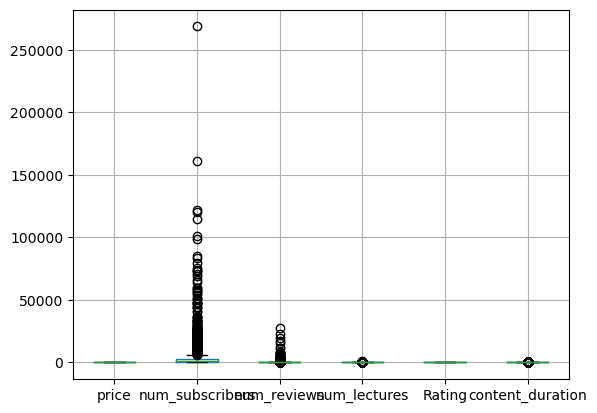

<Figure size 2000x1000 with 0 Axes>

In [13]:
data.boxplot()
plt.figure(figsize = (20,10) )

C:\Users\Vaidees\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_subscribers', ylabel='Density'>

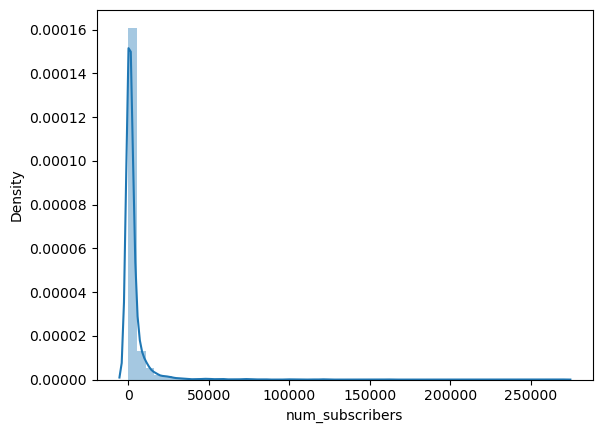

In [14]:
sns.distplot(data["num_subscribers"])

In [15]:
mean=data["num_subscribers"].mean()
std=data["num_subscribers"].std()

upper=data["num_subscribers"].mean()+3*data["num_subscribers"].std()
lower=data["num_subscribers"].mean()-3*data["num_subscribers"].std()

print(" Mean value         :" ,mean,"\n","Standard deveation :", 
      std,"\n","Lower value        :",lower,"\n", "Upper value        :",upper)

 Mean value         : 3199.260881392818 
 Standard deveation : 9486.582965714884 
 Lower value        : -25260.488015751835 
 Upper value        : 31659.009778537467


In [16]:
DATA1= data[(data["num_subscribers"] < upper) & (data["num_subscribers"] > lower)]
DATA1.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
36,195.0,31499.0,450.0,46.0,Beginner Level,0.76,4.0,Subject: Web Development
37,20.0,31070.0,742.0,195.0,Beginner Level,0.07,18.0,Subject: Web Development
38,0.0,30531.0,1948.0,53.0,All Levels,0.78,3.0,Subject: Web Development


In [17]:
data[(data["num_subscribers"] > upper) | (data["num_subscribers"] < lower)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 3003
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             48 non-null     float64
 1   num_subscribers   48 non-null     float64
 2   num_reviews       48 non-null     float64
 3   num_lectures      48 non-null     float64
 4   level             48 non-null     object 
 5   Rating            48 non-null     float64
 6   content_duration  48 non-null     float64
 7   subject           48 non-null     object 
dtypes: float64(6), object(2)
memory usage: 3.4+ KB


22.260981048226107

In [18]:
DATA1.shape

(3628, 8)

C:\Users\Vaidees\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_reviews', ylabel='Density'>

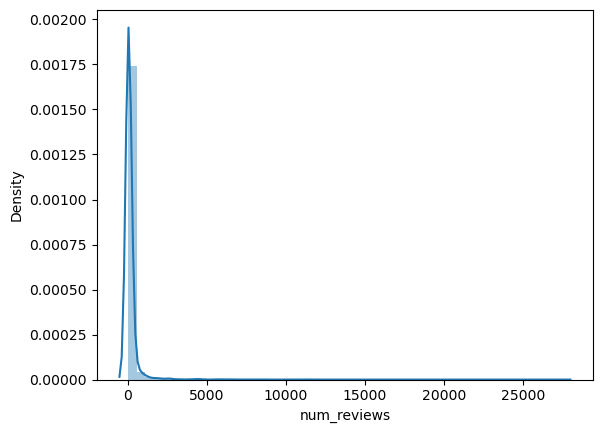

In [19]:
sns.distplot(data["num_reviews"])

In [20]:
mean=data["num_reviews"].mean()
std=data["num_reviews"].std()

upper=data["num_reviews"].mean()+3*data["num_reviews"].std()
lower=data["num_reviews"].mean()-3*data["num_reviews"].std()

print(" Mean value         :" ,mean,"\n","Standard deveation :", 
      std,"\n","Lower value        :",lower,"\n", "Upper value        :",upper)

 Mean value         : 156.30984766050054 
 Standard deveation : 935.6745183964651 
 Lower value        : -2650.713707528895 
 Upper value        : 2963.333402849896


In [21]:
DATA2= data[(data["num_reviews"] < upper) & (data["num_reviews"] > lower)]
DATA2.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development
6,30.0,84897.0,2685.0,10.0,All Levels,0.79,2.0,Subject: Web Development
10,0.0,73110.0,1716.0,22.0,All Levels,0.94,2.0,Subject: Web Development


In [22]:
DATA2.shape

(3649, 8)

C:\Users\Vaidees\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='num_lectures', ylabel='Density'>

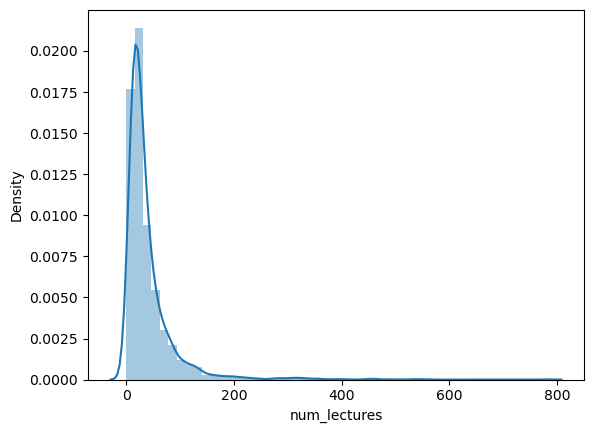

In [23]:
sns.distplot((data["num_lectures"]))

In [24]:
mean=data["num_lectures"].mean()
std=data["num_lectures"].std()

upper=data["num_lectures"].mean()+3*data["num_lectures"].std()
lower=data["num_lectures"].mean()-3*data["num_lectures"].std()

print(" Mean value         :" ,mean,"\n","Standard deveation :", 
      std,"\n","Lower value        :",lower,"\n", "Upper value        :",upper)

 Mean value         : 40.129760609357994 
 Standard deveation : 50.398507439807716 
 Lower value        : -111.06576171006517 
 Upper value        : 191.32528292878115


In [25]:
DATA3= data[(data["num_lectures"] < upper) & (data["num_lectures"] > lower)]
DATA3.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development


In [26]:
DATA3.shape

(3603, 8)

In [27]:
mean=data["content_duration"].mean()
std=data["content_duration"].std()

upper=data["content_duration"].mean()+3*data["content_duration"].std()
lower=data["content_duration"].mean()-3*data["content_duration"].std()

print(" Mean value         :" ,mean,"\n","Standard deveation :", 
      std,"\n","Lower value        :",lower,"\n", "Upper value        :",upper)

 Mean value         : 4.096137105549596 
 Standard deveation : 6.0549479808921705 
 Lower value        : -14.068706837126916 
 Upper value        : 22.260981048226107


In [28]:
DATA4= data[(data["content_duration"] < upper) & (data["content_duration"] > lower)]
DATA4.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,0.0,268923.0,8629.0,45.0,Beginner Level,0.82,10.5,Subject: Web Development
1,0.0,161029.0,279.0,27.0,Expert Level,0.69,3.5,Subject: Web Development
3,0.0,120291.0,5924.0,30.0,All Levels,0.78,3.0,Subject: Web Development


In [29]:
DATA4.shape

(3607, 8)

In [30]:
new1 = pd.merge(DATA1,DATA2)
new1.shape

(3623, 8)

In [31]:
new2=pd.merge(new1,DATA3)
new2.shape

(3566, 8)

In [33]:
new_data=pd.merge(new2,DATA4)
new_data.shape

(3554, 8)

In [34]:
new_data.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject
0,195.0,31499.0,450.0,46.0,Beginner Level,0.76,4.0,Subject: Web Development
1,0.0,30531.0,1948.0,53.0,All Levels,0.78,3.0,Subject: Web Development
2,0.0,29990.0,1342.0,87.0,Beginner Level,0.95,17.5,Subject: Web Development


## feature engineering

In [35]:
new_data.groupby(["level"])["Rating"].mean()

level
All Levels            0.620231
Beginner Level        0.596836
Expert Level          0.592909
Intermediate Level    0.617330
Name: Rating, dtype: float64

In [36]:
mean_level=new_data.groupby(["level"])["Rating"].mean().to_dict()
mean_level

{'All Levels': 0.6202306866952789,
 'Beginner Level': 0.596835650040883,
 'Expert Level': 0.5929090909090909,
 'Intermediate Level': 0.6173300970873786}

In [37]:
new_data["level_mean"]=new_data["level"].map(mean_level)

In [38]:
new_data.groupby(["subject"])["Rating"].mean()

subject
Business Finance            0.691572
Graphic Design              0.730678
Musical Instruments         0.307838
Subject: Web Development    0.644862
Name: Rating, dtype: float64

In [39]:
mean_sub=new_data.groupby(["subject"])["Rating"].mean().to_dict()
mean_sub

{'Business Finance': 0.6915717926932881,
 'Graphic Design': 0.7306779661016949,
 'Musical Instruments': 0.30783783783783786,
 'Subject: Web Development': 0.6448617305976806}

In [40]:
new_data["subject_mean"]=new_data["subject"].map(mean_sub)

In [41]:
new_data.head(3)

,price,num_subscribers,num_reviews,num_lectures,level,Rating,content_duration,subject,level_mean,subject_mean
0,195.0,31499.0,450.0,46.0,Beginner Level,0.76,4.0,Subject: Web Development,0.596836,0.644862
1,0.0,30531.0,1948.0,53.0,All Levels,0.78,3.0,Subject: Web Development,0.620231,0.644862
2,0.0,29990.0,1342.0,87.0,Beginner Level,0.95,17.5,Subject: Web Development,0.596836,0.644862


### Log Transformation

In [42]:
import scipy.stats as stat
import pylab
def plot_data(dataframe,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    dataframe[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(dataframe[feature],dist="norm" ,plot=pylab)
    plt.show()


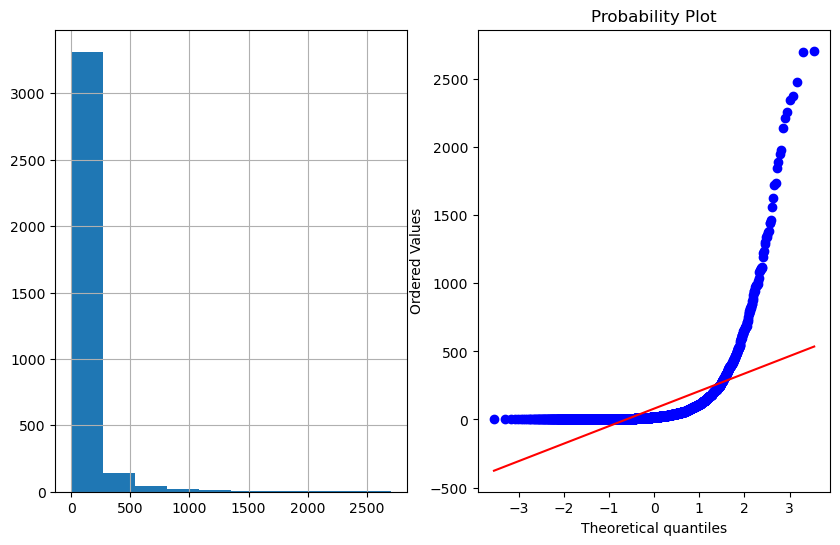

In [43]:
plot_data(new_data,"num_reviews")

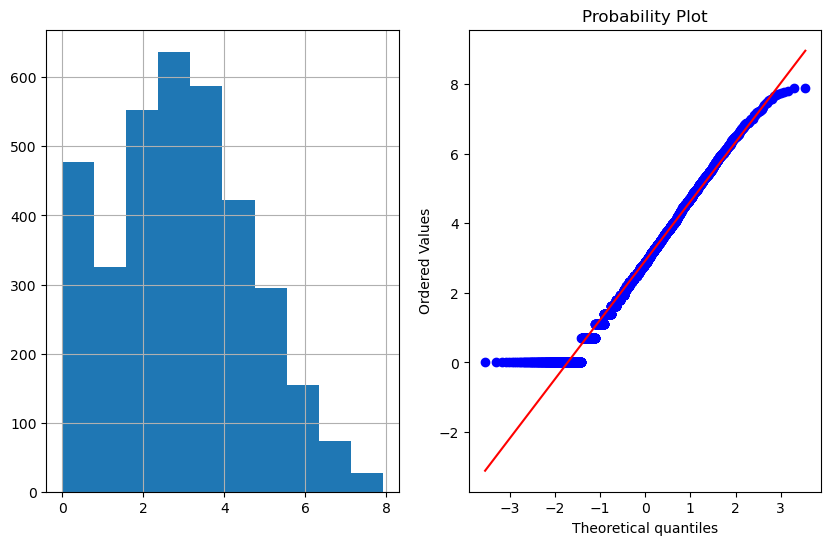

In [48]:
new_data["log_num_reviews"]=np.log1p(new_data["num_reviews"])
plot_data(new_data,"log_num_reviews")

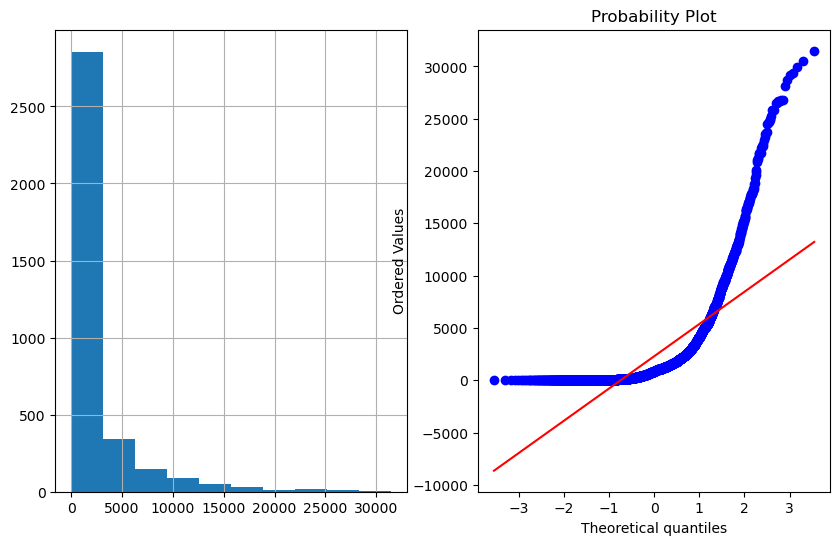

In [44]:
plot_data(new_data,"num_subscribers")

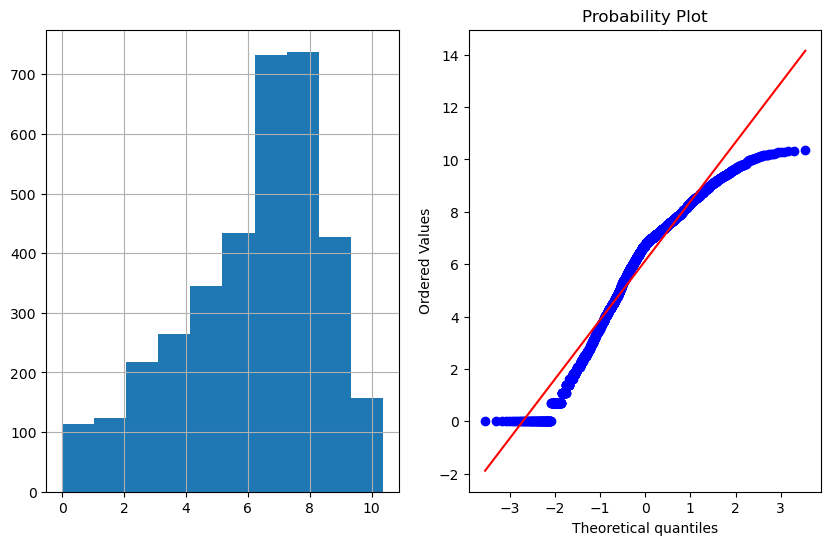

In [45]:
new_data["log_num_subscribers"]=np.log1p(new_data["num_subscribers"])
plot_data(new_data,"log_num_subscribers")

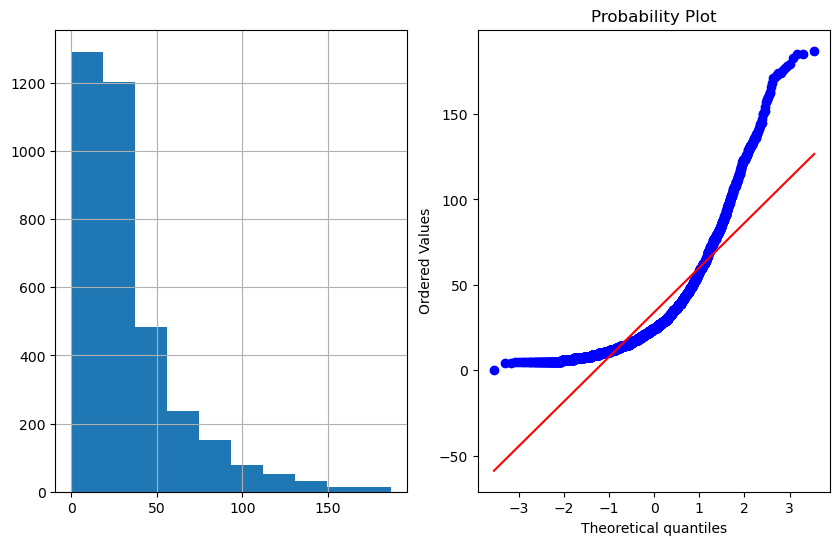

In [53]:
plot_data(new_data,"num_lectures")

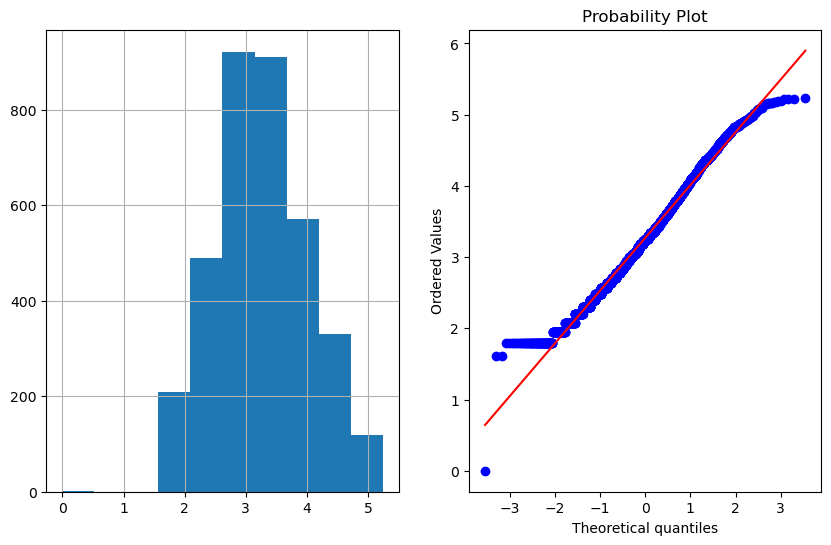

In [54]:
new_data["log_num_lectures"]=np.log1p(new_data["num_lectures"])
plot_data(new_data,"log_num_lectures")

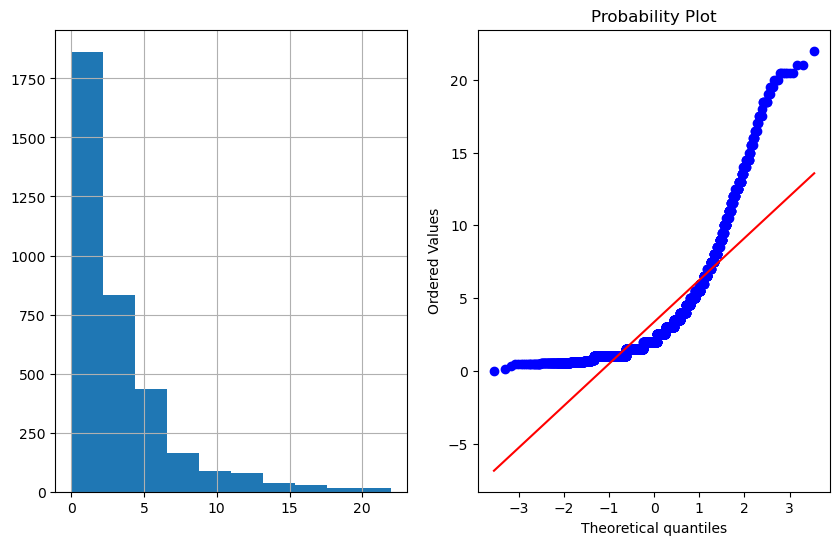

In [46]:
plot_data(new_data,"content_duration")

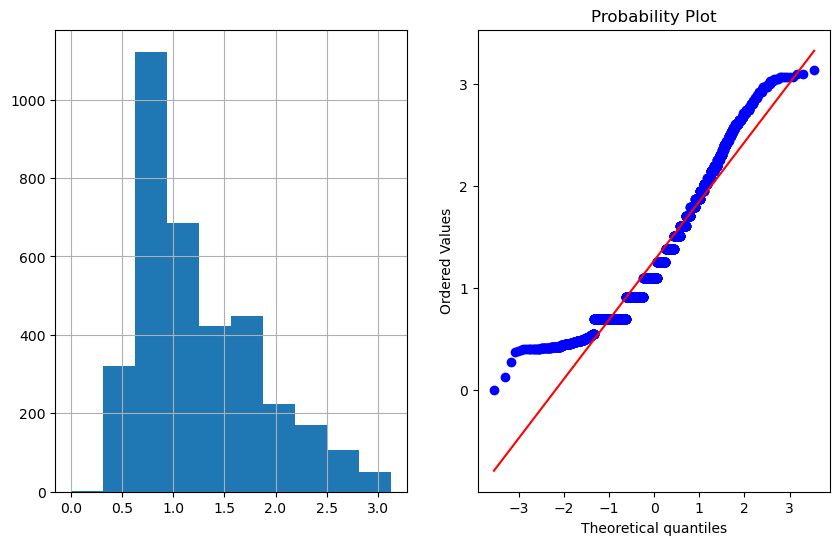

In [47]:
new_data["log_content_duration"]=np.log1p(new_data["content_duration"])
plot_data(new_data,"log_content_duration")

In [49]:
delete=["level","subject"]
new_data.drop(delete,axis=1,inplace=True)

In [54]:
new_data.head(2)

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,level_mean,subject_mean,log_num_subscribers,log_content_duration
0,195.0,31499.0,450.0,46.0,0.76,4.0,0.596836,0.644862,10.357743,1.609438
1,0.0,30531.0,1948.0,53.0,0.78,3.0,0.620231,0.644862,10.326531,1.386294


In [53]:
from sklearn.model_selection import train_test_split
corr_matrix = new_data.corr()
corr_matrix["Rating"].sort_values(ascending=False)

Rating                  1.000000
subject_mean            0.444056
price                   0.035405
level_mean              0.033154
content_duration        0.010402
log_content_duration   -0.005217
log_num_subscribers    -0.005720
num_lectures           -0.047669
num_subscribers        -0.060394
num_reviews            -0.062764
Name: Rating, dtype: float64

In [55]:
corr_matrix 

,price,num_subscribers,num_reviews,num_lectures,Rating,content_duration,level_mean,subject_mean,log_num_subscribers,log_content_duration
price,1.000000,0.077200,0.095521,0.286314,0.035405,0.265262,0.014949,0.103808,0.140523,0.290666
num_subscribers,0.077200,1.000000,0.597583,0.116839,-0.060394,0.109730,0.013694,0.105876,0.627186,0.102501
num_reviews,0.095521,0.597583,1.000000,0.262089,-0.062764,0.254773,-0.016022,0.079883,0.390214,0.232040
num_lectures,0.286314,0.116839,0.262089,1.000000,-0.047669,0.765667,-0.006336,-0.038175,0.196942,0.766085
Rating,0.035405,-0.060394,-0.062764,-0.047669,1.000000,0.010402,0.033154,0.444056,-0.005720,-0.005217
content_duration,0.265262,0.109730,0.254773,0.765667,0.010402,1.000000,0.011343,0.077303,0.174115,0.933610
level_mean,0.014949,0.013694,-0.016022,-0.006336,0.033154,0.011343,1.000000,0.056410,0.021157,0.005329
subject_mean,0.103808,0.105876,0.079883,-0.038175,0.444056,0.077303,0.056410,1.000000,0.162099,0.068579
log_num_subscribers,0.140523,0.627186,0.390214,0.196942,-0.005720,0.174115,0.021157,0.162099,1.000000,0.177723
log_content_duration,0.290666,0.102501,0.232040,0.766085,-0.005217,0.933610,0.005329,0.068579,0.177723,1.000000


## Model preparation

In [56]:
X = new_data.drop('Rating', axis = 1).values
y = new_data["Rating"].values
y=y.reshape(-1,1)

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (2665, 9)
Shape of X_test:  (889, 9)
Shape of y_train:  (2665, 1)
Shape of y_test (889, 1)


## LinearRegression

In [59]:
from sklearn.linear_model import LinearRegression
regressor_linear = LinearRegression()
regressor_linear.fit(X_train, y_train)

LinearRegression()

In [60]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
# Predicting Cross Validation Score the Test set results
cv_linear = cross_val_score(estimator = regressor_linear, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_linear_train = regressor_linear.predict(X_train)
r2_score_linear_train = r2_score(y_train, y_pred_linear_train)

# Predicting R2 Score the Test set results
y_pred_linear_test = regressor_linear.predict(X_test)
r2_score_linear_test = r2_score(y_test, y_pred_linear_test)

# Predicting RMSE the Test set results
rmse_linear = (np.sqrt(mean_squared_error(y_test, y_pred_linear_test)))
print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_linear_train)
print('R2_score (test): ', r2_score_linear_test)
print("RMSE: ", rmse_linear)

CV:  0.21550732055834207
R2_score (train):  0.2244940823691305
R2_score (test):  0.1722002225931596
RMSE:  0.3038512115568577


## PolynomialRegression

In [61]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X_train)
poly_reg.fit(X_poly, y_train)
regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_poly, y_train)

LinearRegression()

In [62]:
from sklearn.metrics import r2_score

# Predicting Cross Validation Score the Test set results
cv_poly2 = cross_val_score(estimator = regressor_poly2, X = X_train, y = y_train, cv = 10)

# Predicting R2 Score the Train set results
y_pred_poly2_train = regressor_poly2.predict(poly_reg.fit_transform(X_train))
r2_score_poly2_train = r2_score(y_train, y_pred_poly2_train)

# Predicting R2 Score the Test set results
y_pred_poly2_test = regressor_poly2.predict(poly_reg.fit_transform(X_test))
r2_score_poly2_test = r2_score(y_test, y_pred_poly2_test)

# Predicting RMSE the Test set results
rmse_poly2 = (np.sqrt(mean_squared_error(y_test, y_pred_poly2_test)))
print('CV: ', cv_poly2.mean())
print('R2_score (train): ', r2_score_poly2_train)
print('R2_score (test): ', r2_score_poly2_test)
print("RMSE: ", rmse_poly2)

CV:  0.21550732055834207
R2_score (train):  0.2244940823691305
R2_score (test):  0.17220022259316015
RMSE:  0.30385121155685757
